# Introduction

Melbourne Housing Project

Using Melbourne_housing.csv data create a model (Linear Regression) to predict a
house's value. We want to be able to understand what creates value
in a house, as though we were a real estate developer. The project
should follow the guideline as:
1. Examine and explore data (visualization, interactions among
features)
2. Apply the model for prediction with holdout and cross
validation
3. Using PCA, apply the model with holdout and cross
validation
4. Visualize the residue and homoscedasticity
5. Tune the model if necessary
6. Write up analysis for each section (for example, explain why
the model is overfitting, explain why applying PCA is better,
etc.)
7. Include conclusions for summary

# A quick look of the datasets

In [76]:
import pandas as pd
import scipy
data = pd.read_csv("./MELBOURNE_HOUSE_PRICES_LESS.csv")
data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [77]:
# Describe the Datasets

In [78]:
print (f"Data has {data.shape[0]} rows and {data.shape[1]} columns")
data.describe()

Data has 63023 rows and 13 columns


,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [79]:
missing_rows = data.isna().sum()
missing_rows

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

# Missing value

In [80]:
missing_rows = data.isna().sum()
print(f'There are {missing_rows[4]} rows do not have price. We will delete those rows')


There are 14590 rows do not have price. We will delete those rows


In [81]:
data = data.dropna()
data.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [82]:
# Dữ liệu dạng object 
data.describe(include='O')

,Suburb,Address,Type,Method,SellerG,Date,Regionname,CouncilArea
count,48433,48433,48433,48433,48433,48433,48433,48433
unique,370,44739,3,5,422,112,8,34
top,Reservoir,56 Victoria St,h,S,Barry,24/03/2018,Northern Metropolitan,Darebin City Council
freq,1067,7,34161,30624,4818,880,13598,3462


# Data exploration

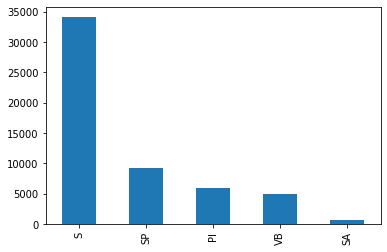

In [83]:
import matplotlib.pyplot as plt
data['Type'].value_counts().head(10).plot.bar()
data['Suburb'].value_counts().head(10).plot.bar()
data['Method'].value_counts().head(10).plot.bar()

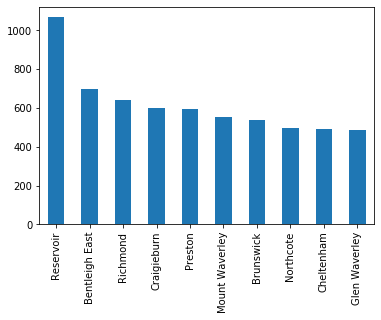

In [84]:
data['Suburb'].value_counts().head(10).plot.bar()

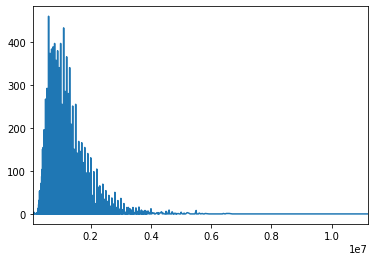

In [85]:
data['Price'].value_counts().sort_index().plot.line()

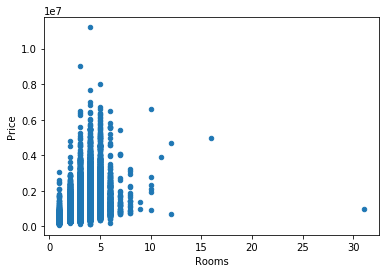

In [86]:
data.plot.scatter(x='Rooms', y='Price')

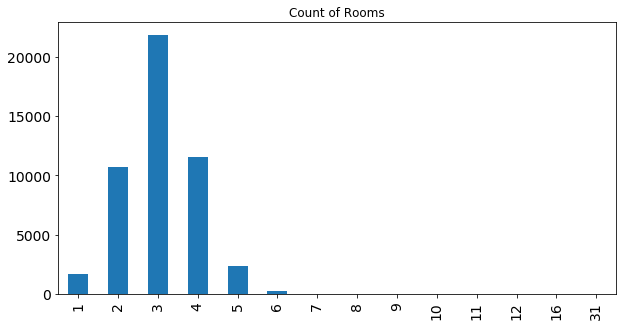

In [87]:
data['Rooms'].value_counts().sort_index().plot.bar(
    figsize = (10,5),
    fontsize = 14,
    title = "Count of Rooms"
)

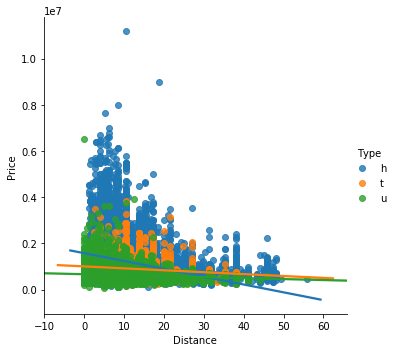

In [88]:
import seaborn as sns
# Multivariant 
sns.lmplot(x='Distance', 
           y='Price',
          hue = 'Type',
          data = data)

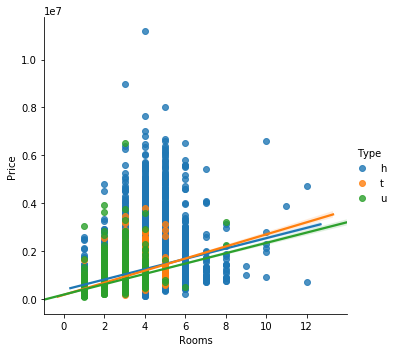

In [89]:
data_temp = data[data['Rooms'] < 15]
sns.lmplot(x='Rooms', 
           y='Price',
          hue = 'Type',
          data = data_temp)

Cùng số phòng thì 
Type t đắt nhất
Type t đắt nhì
Type u rẻ nhất 